# Exploratory Analysis of Dataset "Sustainable Fashion: Ecological Trends".
# Data Source: https://www.kaggle.com/datasets/waqi786/sustainable-fashion-eco-friendly-trends

#IMPORTACIÓN DE BIBLIOTECAS

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING

In [11]:
ms = pd.read_csv(r'sust_fashion_trends.csv', sep=';')

ms.head()


,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-2807,Brand_2807,India,2011,B,Bamboo Fabric,No,411.70,800557.82,10003.49,No,10,65.46,Growing,GOTS
1,BRAND-4022,Brand_4022,Japan,2019,C,Tencel,Yes,360.75,2343635.39,10003.57,No,18,41.74,Stable,GOTS
2,BRAND-3805,Brand_3805,China,2017,B,Recycled Polyester,Yes,32.91,4180701.10,10004.60,Yes,18,379.42,Growing,GOTS
3,BRAND-0906,Brand_906,USA,2021,C,Hemp,Yes,396.45,496659.27,10006.85,Yes,1,25.44,Declining,Fair Trade
4,BRAND-3769,Brand_3769,China,2017,B,Vegan Leather,Yes,435.43,3020817.21,10009.11,Yes,9,332.60,Declining,Fair Trade


In [12]:
# Number of rows and columns
ms.shape

(5000, 15)

In [13]:
# Determine the range of years for the study
min_year = ms['Year'].min()  # Minimum year
max_year = ms['Year'].max()  # Maximum year

# Print the range of years
print(f"The range of years is from {min_year} to {max_year}.")

The range of years is from 2010 to 2024.


In [ ]:
# Dataset summary
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

# DATA PREPARATION AND CLEANING

In [14]:
# DELETION OF COLUMNS “Brand_ID” and “Brand_Name”
ms = ms.drop(['Brand_ID', 'Brand_Name'], axis=1)
ms.shape

(5000, 13)

In [15]:
ms.head()

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,India,2011,B,Bamboo Fabric,No,411.70,800557.82,10003.49,No,10,65.46,Growing,GOTS
1,Japan,2019,C,Tencel,Yes,360.75,2343635.39,10003.57,No,18,41.74,Stable,GOTS
2,China,2017,B,Recycled Polyester,Yes,32.91,4180701.10,10004.60,Yes,18,379.42,Growing,GOTS
3,USA,2021,C,Hemp,Yes,396.45,496659.27,10006.85,Yes,1,25.44,Declining,Fair Trade
4,China,2017,B,Vegan Leather,Yes,435.43,3020817.21,10009.11,Yes,9,332.60,Declining,Fair Trade


In [ ]:
ms.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [ ]:
# Display the count of null values per column
print(ms.isnull().sum())

Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64


In [ ]:
# REMOVE NULL VALUES
ms ['Certifications'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Certifications
Non-Null Count  Dtype 
--------------  ----- 
3996 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [ ]:
ms['Certifications'].describe()

,Certifications
count,3996
unique,4
top,GOTS
freq,1050


In [16]:
# Replace NaN values with the mode
ms['Certifications'].fillna(ms['Certifications'].mode()[0], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18288\3112087640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ms['Certifications'].fillna(ms['Certifications'].mode()[0], inplace=True)


In [17]:
# Change verification:
print(ms['Certifications'].isnull().sum())

0


In [ ]:
# Null values in the “Certifications” column

ms[ms['Certifications'].isnull()]


,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


# DESCRIPTIVE ANALYSIS

In [ ]:
ms.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [18]:
# Statistical summary excluding the year
desc = ms.drop(columns=['Year']).describe().round(2)
print("\nRounded statistical summary (without 'Year'):")
print(desc)


Rounded statistical summary (without 'Year'):
       Carbon_Footprint_MT  Water_Usage_Liters  Waste_Production_KG  \
count              5000.00             5000.00              5000.00   
mean                250.32          2517861.75             50107.30   
std                 142.80          1429043.09             28746.38   
min                   1.04            50106.18              1026.38   
25%                 126.62          1293086.84             25340.80   
50%                 250.65          2499096.00             50466.34   
75%                 372.26          3763859.55             74984.65   
max                 499.93          4999596.61             99947.85   

       Product_Lines  Average_Price_USD  
count        5000.00            5000.00  
mean           10.43             259.35  
std             5.71             137.73  
min             1.00              20.02  
25%             5.00             142.86  
50%            10.00             258.62  
75%            15.0

In [19]:
# Categorical variables
for column in ms.select_dtypes(include=['object']).columns:
    frequency_table = ms[column].value_counts()
    print(f"\nTabla de frecuencia para '{column}':")
    print(frequency_table)


Tabla de frecuencia para 'Country':
Country
UK           515
Germany      507
Italy        506
USA          505
India        503
China        502
Brazil       500
Australia    499
France       497
Japan        466
Name: count, dtype: int64

Tabla de frecuencia para 'Sustainability_Rating':
Sustainability_Rating
B    1278
D    1249
C    1242
A    1231
Name: count, dtype: int64

Tabla de frecuencia para 'Material_Type':
Material_Type
Recycled Polyester    867
Hemp                  844
Vegan Leather         833
Bamboo Fabric         820
Tencel                819
Organic Cotton        817
Name: count, dtype: int64

Tabla de frecuencia para 'Eco_Friendly_Manufacturing':
Eco_Friendly_Manufacturing
Yes    2520
No     2480
Name: count, dtype: int64

Tabla de frecuencia para 'Recycling_Programs':
Recycling_Programs
Yes    2528
No     2472
Name: count, dtype: int64

Tabla de frecuencia para 'Market_Trend':
Market_Trend
Stable       1709
Declining    1679
Growing      1612
Name: count, dtype: in

# DATA VISUALIZATION

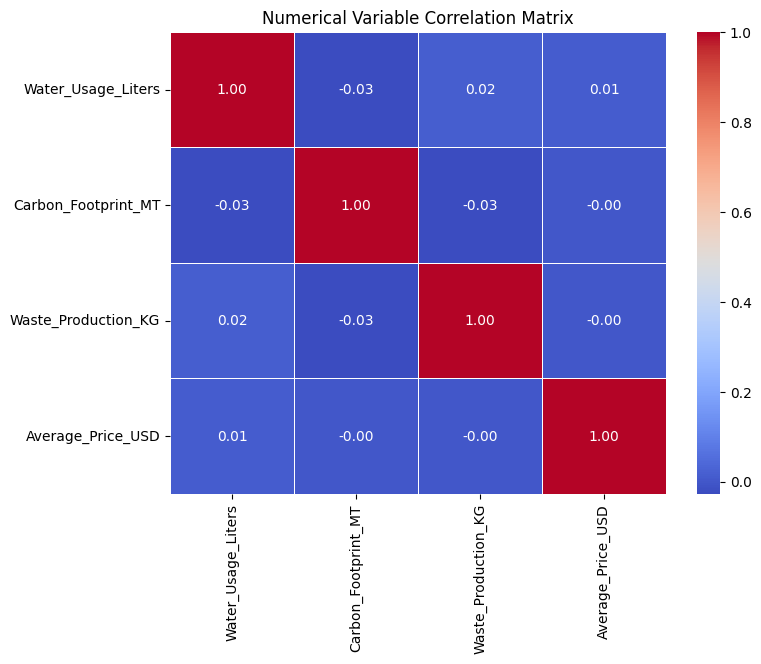

In [20]:
# CORRELATION MATRIX
ms = pd.DataFrame(ms)

# Select only numeric columns except 'Year'
num_columns = ['Water_Usage_Liters', 'Carbon_Footprint_MT', 'Waste_Production_KG', 'Average_Price_USD']

#Calculate the correlation matrix
correlation_matrix = ms[num_columns].corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Titles and labels
plt.title('Numerical Variable Correlation Matrix')
plt.show()

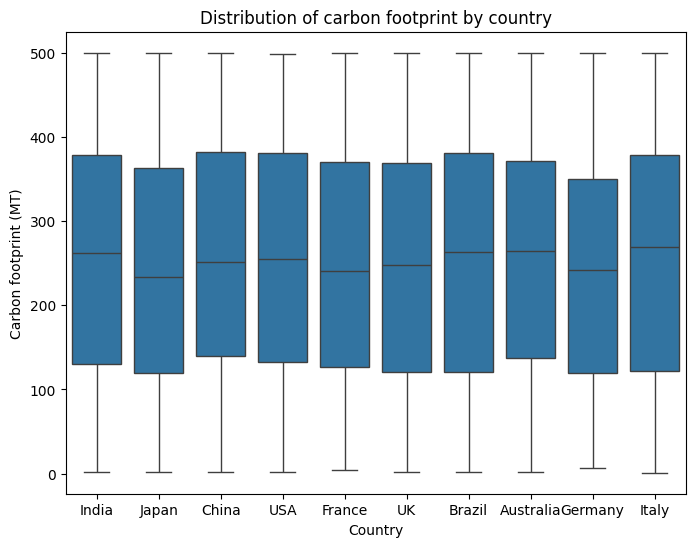

In [21]:
# DISTRIBUTION OF CARBON FOOTPRINT BY COUNTRY
ms = pd.DataFrame(ms)

# Boxplot for ‘carbon footprint’ grouped by 'country'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='Carbon_Footprint_MT', data=ms)

# Titles and labels
plt.title('Distribution of carbon footprint by country')
plt.xlabel('Country')
plt.ylabel('Carbon footprint (MT)')

# Mostrar el gráfico
plt.show()

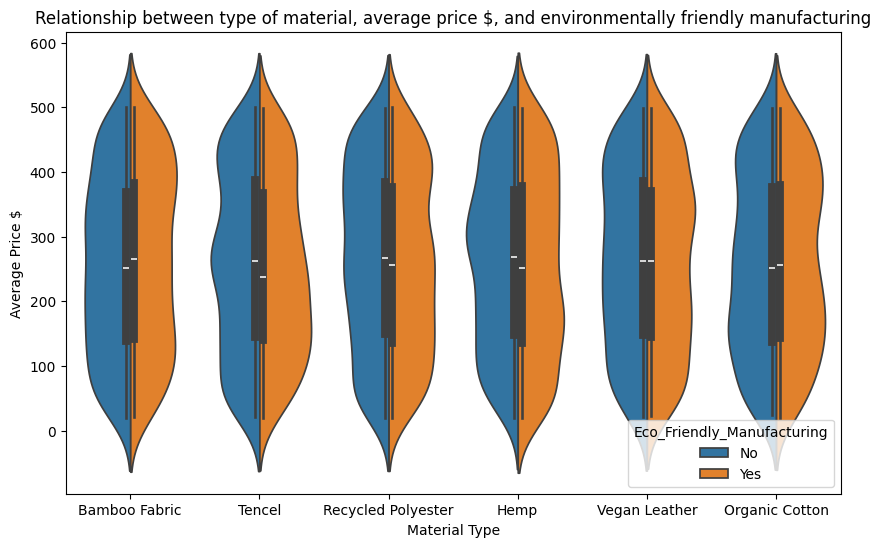

In [22]:
# RELATIONSHIP BETWEEN TYPE OF MATERIAL, AVERAGE PRICE ($), AND ENVIRONMENTALLY FRIENDLY MANUFACTURING
plt.figure(figsize=(10, 6))
sns.violinplot(x='Material_Type', y='Average_Price_USD', hue='Eco_Friendly_Manufacturing', data=ms, split=True)

# Titles and labels
plt.title('Relationship between type of material, average price $, and environmentally friendly manufacturing')
plt.xlabel('Material Type')
plt.ylabel('Average Price $')

# Display the graph
plt.show()


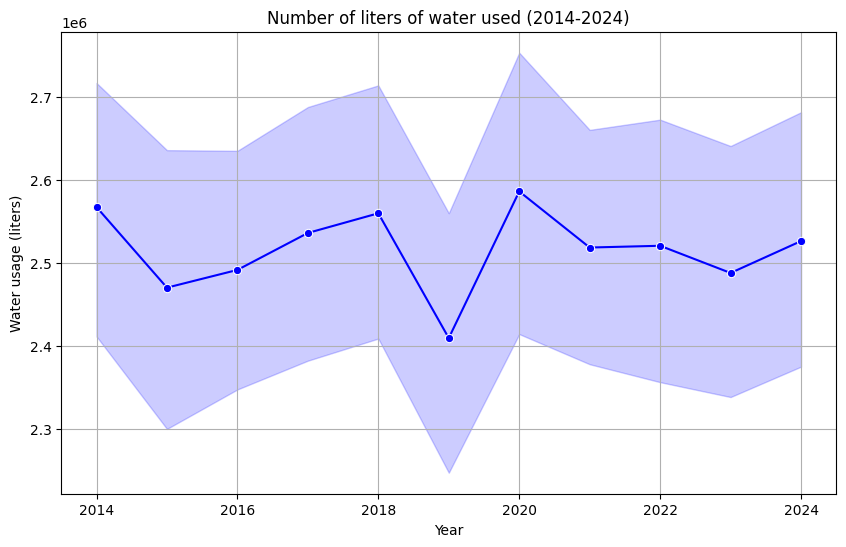

In [23]:
ms = pd.DataFrame(ms)

# Filter data from 2014 to 2024
ms_filtered = ms[(ms['Year'] >= 2014) & (ms['Year'] <= 2024)]

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Water_Usage_Liters', data=ms_filtered, marker='o', color='b')

# Titles and labels
plt.title('Number of liters of water used (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Water usage (liters)')

# Display the graph
plt.grid(True)
plt.show()

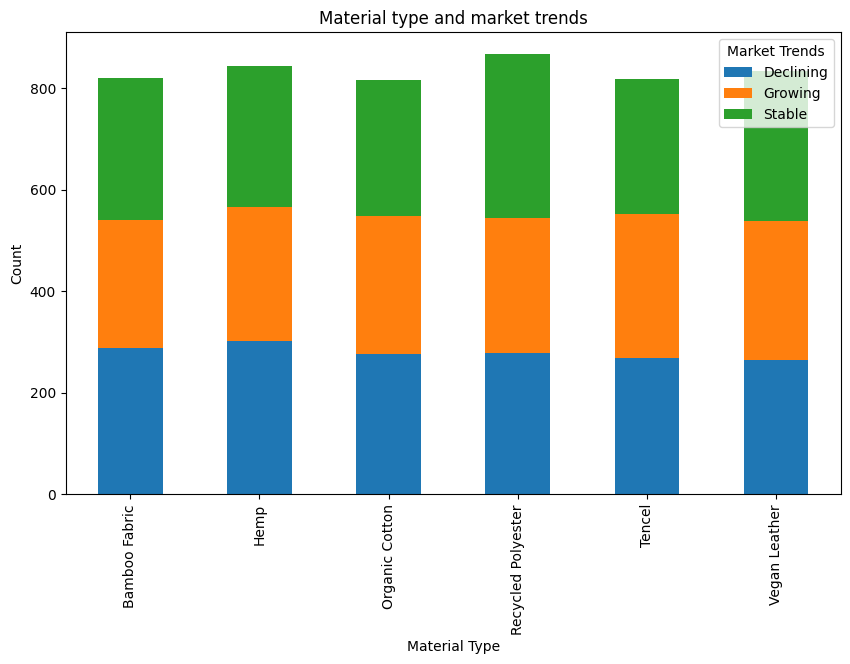

In [24]:
# HEAT MAP MATERIAL TYPE AND MARKET TREND
ms = pd.DataFrame(ms)

#Count occurrences
count_data = ms.groupby(['Material_Type', 'Market_Trend']).size().unstack(fill_value=0)

#Create stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

#Titles and labels
plt.title('Material type and market trends')
plt.xlabel('Material Type')
plt.ylabel('Count')
plt.legend(title='Market Trends')

# Display the graph
plt.show()

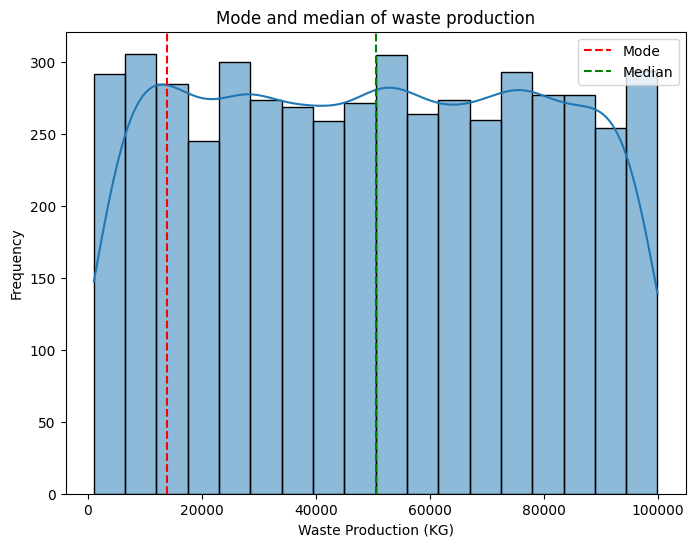

In [25]:
# MODE AND MEDIAN FOR THE VARIABLES Waste_Production_KG

import matplotlib.pyplot as plt

# Calculate the mode and median for the variable Waste_Production_KG
mode_waste = ms['Waste_Production_KG'].mode()[0]
median_waste = ms['Waste_Production_KG'].median()

# Create the graph
plt.figure(figsize=(8, 6))
sns.histplot(ms['Waste_Production_KG'], kde=True)
plt.axvline(mode_waste, color='red', linestyle='--', label='Mode')
plt.axvline(median_waste, color='green', linestyle='--', label='Median')
plt.xlabel('Waste Production (KG)')
plt.ylabel('Frequency')
plt.title('Mode and median of waste production')
plt.legend()
plt.show()


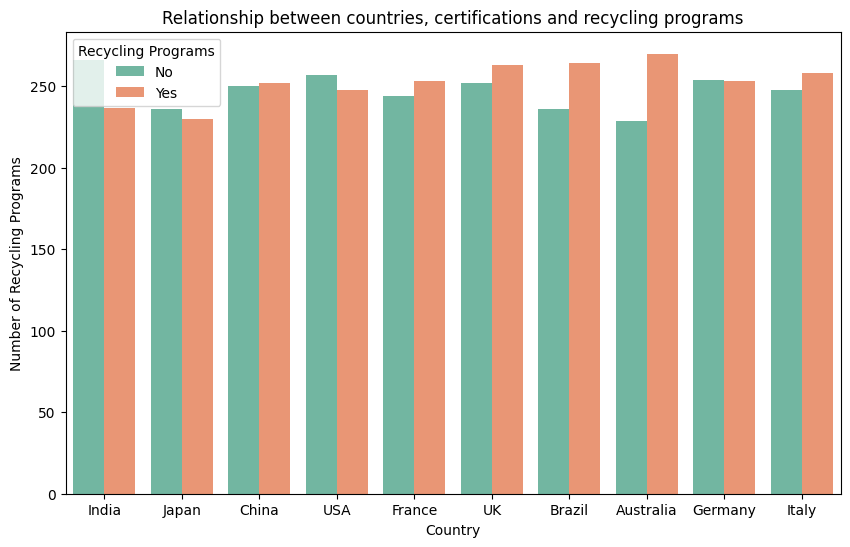

In [26]:
ms = pd.DataFrame(ms)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Recycling_Programs', data=ms, palette='Set2')

# Titles and labels
plt.title('Relationship between countries, certifications and recycling programs')
plt.xlabel('Country')
plt.ylabel('Number of Recycling Programs')
plt.legend(title='Recycling Programs')

# Display the graph
plt.show()
